# Деревья решений

## Определение дерева решений

* Это бинарное дерево.
* Каждой внутренней вершине приписана функция (предикат), которая возвращает TRUE или FALSE.
* Каждой листовой вершине приписан прогноз (например, в виде вероятности).

Могут быть многомерные признаки (линейные, метрические). Но с ними очень тяжело работать, на практике они редко применяются, поэтому мы будем использовать только одномерные предикаты:
$$ \beta_v (x;j,t)  = [x_j<t] $$
Здесь $v$ - это вершина, $x_j$ - значение $j$-го признака объекта $x$, $t$ - это порог 

## Построение дерева

Опишем жадный алгоритм построения бинарного дерева решений:
1. Начинаем со всей обучающей выборки $X$.
2. Задаём функционал качества $Q(X, j, t)$ и критерий остановки. 
3. Находим наилучшее с точки зрения $Q$ разбиение $X$ на две части: $R_{left} = \lbrace x|x_j<t \rbrace$ и $R_{right} = \lbrace x|x_j \geqslant t \rbrace$
4. Создадим вершину (для первого шага корневую), поместив в неё предикат $[x_j<t]$
5. Поместим $R_{left}$ и $R_{right}$ соответсвенно в левое и правое поддерево.
6. Рекурсивно повторяем шаги 3-5 пока не выполнится критерий остановки.
7. Поставим в соответствие каждому листу ответ. Для задачи классификации - это самый частый среди объектов класс или вектор с долями классов (можно интерпретировать как вероятности). Для задачи регрессии - например, среднее значение целевой переменной по всем объектам в этом листе.  


При построении дерева, нужно понять, 1) какой признак $j$ выбрать на каждом шаге, 2) какой порог $t$ выбрать для создания предиката  $[x_j<t]$, 3) когда остановиться. 

Выбор признака и порога зависят от того, какой задан функционала качества $Q(X, j, t)$. Об этом в следующем разделе.

Критерии остановки:
* ограничение максимальной глубины дерева
* ограничение минимального числа объектов в листе
* ограничение максимального количества листьев в дереве
* purity (остановка, если все объекты в листе относятся к одному классу)




## Функционал качества для деревьев решений


Энтропия Шеннона для системы с N возможными состояниями определяется по формуле:
$$H = - \sum_{i=0}^{N} p_i\log_2p_i $$

где $p_i$ – вероятности нахождения системы в $i$-ом состоянии. 

Это очень важное понятие теории информации, которое позволяет оценить количество информации (степень хаоса в системе). Чем выше энтропия, тем менее упорядочена система и наоборот. С помощью энтропии мы формализуем функционал качества для разделение выборки (для задачи классификации).

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import random
from pprint import pprint

Код для расчёта энтропии:

In [ ]:
def entropy(y):
    
    _, counts = np.unique(y, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
     
    return entropy

Здесь y - это массив значений целевой переменной

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
entropy(iris.target)

1.584962500721156

In [ ]:
entropy(iris.target[:100])

1.0

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.8, random_state=42)

In [ ]:
entropy(y_test)

1.582879624786234

In [ ]:
y_train.size

30

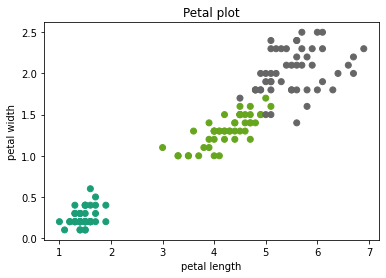

In [ ]:
plt.scatter(iris.data[:,2:3],iris.data[:,3:4],c=iris.target, cmap=plt.cm.Dark2)
plt.title('Petal plot')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

Кажется, что если petal length меньше 2.5, то мы имеет разбиение, в котором одно поддерево будет содержать объекты только одного класса.

In [ ]:
df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.drop(['target'], axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
entropy(df['species'])

1.584962500721156

In [ ]:
sample1 = df[df['petal length (cm)']<2.5]

In [ ]:
entropy(sample1['species'])

0.0

In [ ]:
sample2 = df[df['petal length (cm)']>2.5]
entropy(sample2['species'])

1.0

Давайте попробуем другое разбиение.

In [ ]:
sample1 = df[df['petal length (cm)']<5]
sample2 = df[df['petal length (cm)']>=5]

In [ ]:
print(entropy(sample1['species']))
print(entropy(sample2['species']))

1.2602398669134125
0.2580186686648155


Как мы говорили ранее  энтропия – по сути степень хаоса (или неопределенности) в системе. Уменьшение энтропии называют приростом информации (information gain, IG).

В нашем случае, в исходных данных энтропия была равна примерно 1.58. В первом разбиении 1.0, а во втором примерно 1.52. Оба разбиения уменьшили энтропию. Но первое разбиение уменьшило её сильнее, значит второе разбиение хуже. 

Обочначим $R_v$ - объекты, которые нужно разделить в помощью предиката в вершине $v$. Запишем формулу для расчёта информационного прироста:
$$ Q = IG = H(R_v) - (H(R_{left})+H(R_{right}))$$

На каждом шаге нам нужно максимизировать этот функционал качества. Как это делать? Например, так можно перебрать $t$ для выбранного $j$.

In [ ]:
grid = np.linspace(df['petal length (cm)'].min(), df['petal length (cm)'].max(), 10)

best_t = grid[0]
best_IG = -1
for t in grid:
  sample1 = df[df['petal length (cm)'] < t]
  sample2 = df[df['petal length (cm)'] >= t]
  IG = entropy (df['species']) - (entropy(sample1['species']) + entropy(sample2['species']))
  # print (IG)
  if IG > best_IG:
    best_t, best_IG  = t, IG

print (best_t) 

2.311111111111111


## Задание 4.1

Реализуйте алгоритм построения дерева. Должны быть отдельные функции (методы) для расчёта энтропии (уже есть), для разделения дерева (используйте `pandas`), для подсчёта функционала качества, для выбора наилучшего разделения (с учетом признаком и порогов, для проверки критерия остановки.

Функционал качества $IG$.

Для набора данных iris реализуйте алгоритм и минимум три из разными критерия остановки из перечисленных ниже:
* максимальной глубины дерева = 5
* минимального числа объектов в листе = 5
* максимальное количество листьев в дереве = 5
* purity (остановка, если все объекты в листе относятся к одному классу)

Реализуйте функцию predict (на вход функции подаётся датафрейм с объектами)

Оцените точность каждой модели с помощью метрики точность (`from sklearn.metrics import accuracy_score` или реализовать свою).

In [ ]:
X = df.drop(['target', 'species'], axis=1).values
y = pd.Categorical.from_codes(iris.target, iris.target_names)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
from collections import Counter

In [ ]:
# Класс построения бинарного дерева
class Node:
    def __init__(self, depth=0, name='c'):
        self.depth = depth
        self.name = name
        
        self.left = None
        self.right = None
        self.value = None
        
    def set_value(self, value):
        self.value = value
    
    def check_value(self, x):
        if isinstance(self.value, tuple):
            if x[self.value[0]] < self.value[1]:
                return self.left
            else:
                return self.right
        else:
            return self.value
    
    def add_child(self, is_left=True):
        if is_left:
            self.left = Node(depth=self.depth + 1, name=self.name + 'l')
            return self.left
        else:
            self.right = Node(depth=self.depth + 1, name=self.name + 'r')
            return self.right
    
    def has_child(self):
        res = False
        if self.left is not None or \
           self.right is not None:
            res = True
        return res

Tree = Node

In [ ]:
def get_best_split(data):
        best_gain, best_value, best_col = 10, np.NaN, -1
        for col in range(data.shape[1] - 1):
            data_sorted_over_col = data[data[:, col].argsort()]
            y = data_sorted_over_col[:, -1]
            split_indices = np.argwhere((y - np.roll(y, -1))[:-1] != 0)
            for idx in split_indices:
                curr_idx = idx[0] + 1
                split_val = data_sorted_over_col[curr_idx, col]
                left, right = make_split(data_sorted_over_col, col, split_val)
                
                curr_gain = gain([left[:, -1], right[:, -1]])
                if curr_gain < best_gain:
                    best_gain = curr_gain
                    best_value = split_val
                    best_col = col
        data_sorted_over_col = data[data[:, best_col].argsort()]
        left, right = make_split(data, best_col, best_value)
        return left, right, best_col, best_value



def make_split(data, col_index, value):
  left = data[data[:, col_index] < value]
  right = data[data[:, col_index] >= value]
  return left, right



def gain(subseqs):
  seq = []
  for subseq in subseqs:
    seq += list(subseq)
  h0 = entropy(seq)
  h1 = np.sum([len(subseq) / len(seq) * entropy(subseq) for subseq in subseqs])
  return h1 - h0

In [ ]:
class DecisionTreeCustom:
    def __init__(self, max_depth, min_samples_leaf):
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
    
    def _to_leaf(self, node, data_part):
        cntr = Counter(data_part[:, -1])
        leaf_val = cntr.most_common(1)[0][0]
        node.set_value(leaf_val)
        return node
    
    def tree(self, X, node=None):
        if node is None:
            node = Tree()

        if node.depth > self.max_depth:
            return self._to_leaf(node, X)
        
        if entropy(X[:, -1]) > 0:
            left, right, col, val = get_best_split(X)
        else:
            return self._to_leaf(node, X)
            
        node.set_value((col, val))

        if left.size > self.min_samples_leaf:
            self.tree(left, node.add_child(is_left=True))
        else:
            self.tree(node.add_child(is_left=True), left)
        
        
        if right.size > self.min_samples_leaf:
            self.tree(right, node.add_child(is_left=False))
        else:
            self.tree(node.add_child(is_left=False), right)
        
        return node
        
# обучение дерева  
    def fit(self, X, y):
        XY_stacked = np.hstack((X, y))
        self.tree = self.tree(XY_stacked)

# предсказание
    def predict(self, X):
        predictions = []
        for x in X:
            decision = self.tree.check_value(x)
            while isinstance(decision, Node):
                decision = decision.check_value(x)
            predictions.append(decision)
        return np.array(predictions)
      

In [ ]:
# Обучаем классификатор
dt = DecisionTreeCustom(max_depth=5, min_samples_leaf=5)
dt.fit(X_train, y_train)

ValueError: ignored

In [ ]:
entropy(X_test[:,-1])

0.8096893113439168

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = dt.predict(X_test)
print('Точность алгоритма', accuracy_score(y_test, y_pred))

Точность алгоритма 0.8573333333333333


# Пример из sklearn

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=42)

In [ ]:
simple_tree = DecisionTreeClassifier()

Посмотрим на гиперпараметры алгоритмы. Кроме уже известных нам (выбор критерия, по кооторому счиатется функционал качества, критериев остановки), там есть ещё несколько любопытных настроек. В частности, можно ограничивать признаки, которые будут участвовать в предикатах. Зачем это может понадобиться?

In [ ]:
DecisionTreeClassifier?

In [ ]:
simple_tree.fit(X_train, y_train)
simple_tree.score(X_test, y_test)

1.0

In [ ]:
simple_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
np.mean(cross_val_score(simple_tree, X_train, y_train, cv=5)) # будем использовать кросс-валидацию

0.9199999999999999

Попробуем улучшить этот результат, за счёт настройки гиперпараметров.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
tree_params = {'max_depth': np.arange(1, 11), 'min_samples_leaf':np.arange(1, 20)}

In [ ]:
tree_grid = GridSearchCV(simple_tree, tree_params)

In [ ]:
%time
tree_grid.fit(X_train, y_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8

In [ ]:
tree_grid.score(X_test, y_test)

0.98

In [ ]:
tree_grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree_grid.best_params_

{'max_depth': 4, 'min_samples_leaf': 1}

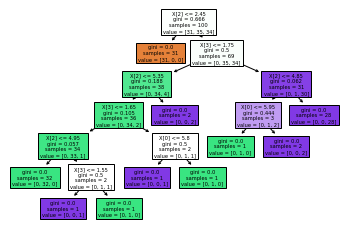

In [ ]:
from sklearn.tree import plot_tree

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(simple_tree, filled=True)
plt.show()

Визуализация дерева решений: https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py

# Композиция деревьев

Давайте сначала рассмотрим общую идею. Вы уже узнали разные семейства алгоритмов, подходящих для решения задачи классификации. Также вы научились выбирать наилучший алгоритм из заданного семейства и оценивать качество этих алгоритмов. Предположим, вы уже нашли самый лучший модель и повысить его качество больше не можете. В таком случае нужно применить техники объединения разных (более слабых) алгоритмов в один (более сильный). Эта техника назвается «ансамбли» или  «композиции». 

Ансамбль — это некая совокупность, части которой образуют единое целое. 

Несложно доказать, что, например, в задаче бинарной классификации, если предсказание каждого алгоритма не зависит от других алгоритмов, и если вероятность правильного ответа больше случайного угадывания (то есть в нащем примере больше 0.5), то тогда вероятность правильного ответа композации таких алгоритмов в целом возрастает с увеличением их количества и стремится к единице.



"Мудрость толпы". 

В 1906 году Фрэнсис Гальтон (это тот же, который придумал термин "регрессия") посещал выставку достижений животноводства. На выставке проводился конкурс, в рамках которого всем желающим предлагалось на глаз угадать точный вес быка. Около 800 человек пытались, но ни один  не угадал точный вес быка. Бык весил 1198 фунтов. Гальтон посчитал среднее значение по всем ответам, и получил 1197 фунтов.

На основе деревьев решений можно собрать более сильный классификатор: случайный лес (*random forest*) - один из самых распространённых ансамблей алгоритмов.

Опишем алгоритм и попутно разберём основные идеи:

1. Зададим $N$ - число деревьев в лесу.
2. Для каждого $n$ из $N$ сгенерируем свою выборку $X_n$. Пусть $m$ - это количество объектов в $X$. При генерации каждой $X_n$ мы будем брать объекты $m$ раз с возвращением. То есть один и тот же объект может попасть в выборку несколько раз, а какие-то объекты не попадут. (Этот способ назвается бутстрап).
3. По каждой $X_n$ построим решающее дерево $b_n$. В качестве критериев остановки можно использовать `max_depth` или `min_samples_leaf`. В задачах классификации строить каждое дерево до тех пор, пока в каждом листе не окажется по одному объекту. При каждом разбиении сначала выбирается $k$ (эвристика $k = \sqrt d$, где $d$ - это число признаков объектов из выборки $X$) случайных признаков из исходных, и оптимальное разделение выборки ищется только среди них.
4. Итоговый алгоритм будет представлять собой результат голосования (для классификации) и среднее арифметическое (для регрессии). Модификация алгоритма предполагает учёт весов каждого отдельного слабого алгоритма в ансамбле.








## Задание 4.2

В качестве набора данных используйте: https://www.kaggle.com/mathchi/churn-for-bank-customers

Там есть описание и примеры работы с этими данными. Если кратко, речь идёт про задачу прогнозирования оттока клиентов. Есть данные о 10 тысячах клиентов банка, часть из которых больше не являются клиентами.

Используя либо свою реализацию, либо  `DecisionTreeClassifier` с разными настройками из `sklearn.tree` реализйте алгоритм "случайный лес". 

Найдите наилучшие гиперпараметры этого алгоритма: количество деревьев, критерий остановки, функционал качества, минимальное количество объектов в листьях и другие.

Нельзя использовать готовую реализацию случайного леса из `sklearn`.

В подобных задачах очень важна интерпретируемость алгоритма. Попытайтесь оценить информативность признаков, т.е. ответить а вопрос, значения каких признаков являются самыми важными индикаторами того, что банк потеряет клиента.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Data/churn.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# убираем все нечисловые признаки и целевую переменную
data = pd.concat([data, pd.get_dummies(data['Geography'])], axis=1)
data['Gender'].replace({'Female': 0, 'Male': 1}, inplace=True)
X = data.drop(['Surname', 'Gender', 'Geography', 'Exited'], axis=1).values
X

array([[1.0000000e+00, 1.5634602e+07, 6.1900000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.0000000e+00, 1.5647311e+07, 6.0800000e+02, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [3.0000000e+00, 1.5619304e+07, 5.0200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [9.9980000e+03, 1.5584532e+07, 7.0900000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.9990000e+03, 1.5682355e+07, 7.7200000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+04, 1.5628319e+07, 7.9200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [ ]:
Y = data['Exited'].values.reshape(-1, 1)
Y

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, shuffle=True);
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 13) (3000, 13) (7000, 1) (3000, 1)


In [ ]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import mode

class RandomForestClassifierCustom(BaseEstimator):
    def __init__(self, n_estimators=10, max_depth=10, max_features=10, 
                 random_state=20):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.random_state = random_state
        
        self.trees = []
        self.feat_ids_by_tree = []
        
    def fit(self, X, y):
        for i in range(self.n_estimators):
            np.random.seed(i + self.random_state)
            feat_to_use_ids = np.random.choice(range(X.shape[1]), self.max_features, 
                                              replace=False)
            examples_to_use = list(set(np.random.choice(range(X.shape[0]), X.shape[0],
                                              replace=True)))
            self.feat_ids_by_tree.append(feat_to_use_ids)
            dt = DecisionTreeClassifier(class_weight='balanced',
                                        max_depth=self.max_depth, 
                                        max_features=self.max_features, 
                                        random_state = self.random_state)
            dt.fit(X[examples_to_use, :][:, feat_to_use_ids], y[examples_to_use])
            self.trees.append(dt)
        return self
    
    def predict_proba(self, X):
        predictions = []
        for tree, features in zip(self.trees, self.feat_ids_by_tree):
            prediction = tree.predict(X[:, features])
            predictions.append(prediction)
        
        predictions = np.array(predictions)
        predictions = mode(predictions)[0]
        return np.array(predictions)[0]

In [ ]:
rf = RandomForestClassifierCustom(n_estimators=5, max_depth=5, max_features=5, 
                 random_state=5)
rf.fit(X_train, y_train)

RandomForestClassifierCustom(max_depth=5, max_features=5, n_estimators=5,
                             random_state=5)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = rf.predict_proba(X_test)
print('Точность алгоритма', accuracy_score(y_test, y_pred))

Точность алгоритма 0.63


In [ ]:
# попробуем другие гиперпараметры
rf = RandomForestClassifierCustom(n_estimators=20, max_depth=20, max_features=10, 
                 random_state=20)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_test)
print('Точность алгоритма', accuracy_score(y_test, y_pred))

Точность алгоритма 0.8493333333333334


In [ ]:
# попробуем другие гиперпараметры
rf = RandomForestClassifierCustom(n_estimators=30, max_depth=20, max_features=10, 
                 random_state=16)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_test)
print('Точность алгоритма', accuracy_score(y_test, y_pred))

Точность алгоритма 0.8486666666666667
